<a href="https://colab.research.google.com/github/svgoudar/data_science_tutorial/blob/main/ML/21.Anamoly_Detection/Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Isolation Forest Anomaly Detection

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/svgoudar/datasets/refs/heads/main/healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


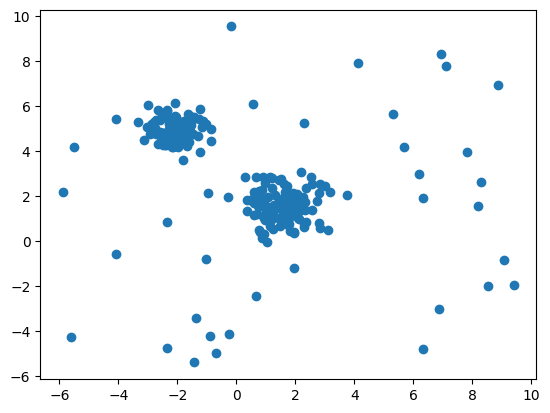

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [5]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [6]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  4,  20,  24,  45,  48,  53,  55,  61,  62,  63,  67,  72,  74,
         78,  83,  85,  87,  92,  97, 104, 108, 114, 119, 126, 130, 132,
        133, 141, 151, 160, 166, 167, 177, 179, 182, 187, 197, 199, 204,
        209, 212, 214, 217, 220, 221, 227, 242, 244, 247, 248]),)

In [7]:
x=df.values

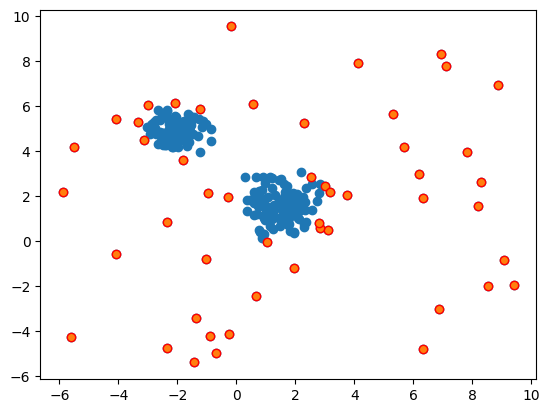

In [8]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

## DBSCAN Clutering

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [10]:

X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

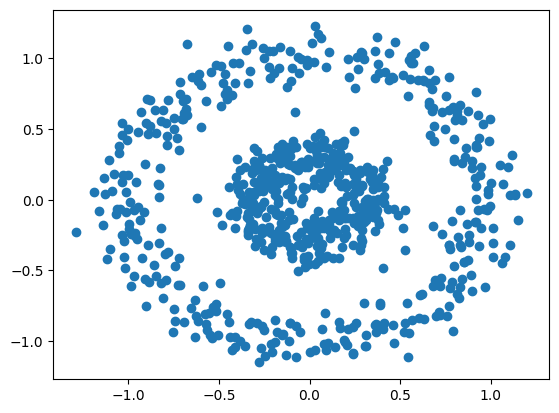

In [11]:
plt.scatter(X[:,0],X[:,1])

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbcan=DBSCAN(eps=0.1)

In [14]:
dbcan.fit_predict(X)

array([ 0,  1,  2,  3,  3,  3,  4,  3,  3,  3,  3,  4,  2,  3,  2,  3,  5,
        3,  0,  6,  1,  3,  7,  0,  7,  3,  3,  3,  0,  4,  8,  3,  3,  3,
        8,  5, -1,  3,  3,  3,  0,  3,  7,  3, 12,  0,  2,  4,  3,  3, -1,
        1, 12,  1,  0,  3,  3,  4, -1,  3,  8,  0,  2,  3,  1,  3,  4,  4,
        6,  3,  3,  3,  3,  3, -1,  1,  3,  2,  3,  3,  5,  2,  7,  0,  4,
        2,  5,  3, -1,  3,  3,  3,  6,  3,  7,  0,  3,  3,  2,  3,  3,  3,
        3,  3,  3,  7,  7,  7,  3,  7,  3,  0,  3,  3,  6,  3,  2,  4,  1,
        6,  8,  9,  3,  4,  3,  2,  7,  2,  3,  3,  1,  3,  3,  3,  3,  3,
        7,  1,  3,  3,  6, -1,  3,  6,  1,  3,  3,  0,  8,  7,  7, -1,  7,
        3,  0,  3,  3,  6, -1,  3,  9, -1,  3, -1,  3,  0, 12,  3,  3,  3,
        6,  7,  4,  2,  0,  0,  3,  3,  2,  3,  7,  3,  3,  1,  3, -1,  2,
        1,  3,  3,  3,  3,  3,  3, -1,  8,  1, -1,  3,  0,  3, -1, -1,  2,
        3, -1,  3,  3,  3,  0,  1,  3,  3,  3,  7,  3,  3,  3,  2,  7,  3,
        3,  3, -1,  9,  3

In [15]:
dbcan.labels_

array([ 0,  1,  2,  3,  3,  3,  4,  3,  3,  3,  3,  4,  2,  3,  2,  3,  5,
        3,  0,  6,  1,  3,  7,  0,  7,  3,  3,  3,  0,  4,  8,  3,  3,  3,
        8,  5, -1,  3,  3,  3,  0,  3,  7,  3, 12,  0,  2,  4,  3,  3, -1,
        1, 12,  1,  0,  3,  3,  4, -1,  3,  8,  0,  2,  3,  1,  3,  4,  4,
        6,  3,  3,  3,  3,  3, -1,  1,  3,  2,  3,  3,  5,  2,  7,  0,  4,
        2,  5,  3, -1,  3,  3,  3,  6,  3,  7,  0,  3,  3,  2,  3,  3,  3,
        3,  3,  3,  7,  7,  7,  3,  7,  3,  0,  3,  3,  6,  3,  2,  4,  1,
        6,  8,  9,  3,  4,  3,  2,  7,  2,  3,  3,  1,  3,  3,  3,  3,  3,
        7,  1,  3,  3,  6, -1,  3,  6,  1,  3,  3,  0,  8,  7,  7, -1,  7,
        3,  0,  3,  3,  6, -1,  3,  9, -1,  3, -1,  3,  0, 12,  3,  3,  3,
        6,  7,  4,  2,  0,  0,  3,  3,  2,  3,  7,  3,  3,  1,  3, -1,  2,
        1,  3,  3,  3,  3,  3,  3, -1,  8,  1, -1,  3,  0,  3, -1, -1,  2,
        3, -1,  3,  3,  3,  0,  1,  3,  3,  3,  7,  3,  3,  3,  2,  7,  3,
        3,  3, -1,  9,  3

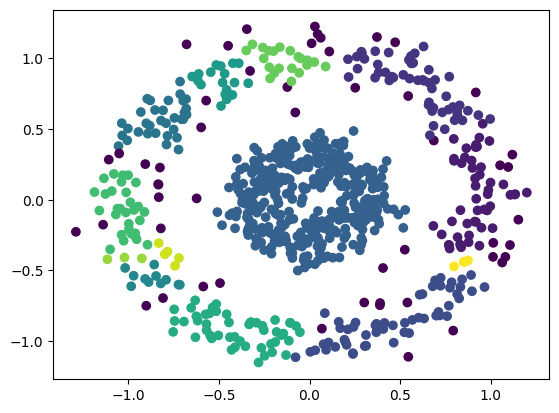

In [16]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

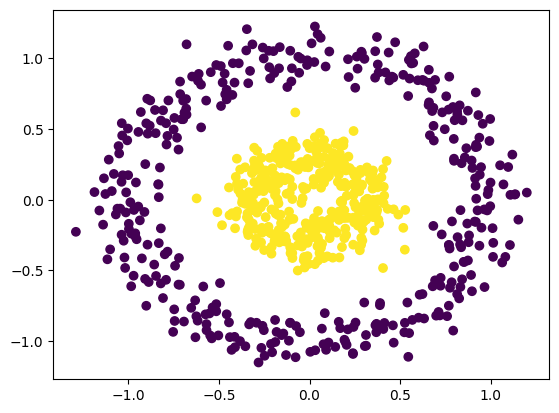

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)